# Tag the binding site on all proteins of the dataset. WITHOUT ALPHAFOLD STRUCTURES

In [3]:
## Imports and settings
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
#%matplotlib inline
sns.set_style("darkgrid")

import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output


# from tqdm.auto import tqdm
from tqdm.notebook import tnrange, tqdm

tqdm.pandas()  # activate tqdm progressbar for pandas apply

pd.options.mode.chained_assignment = (
    None  # default='warn', remove pandas warning when adding a new column
)
pd.set_option("display.max_columns", None)

from IPython.core.interactiveshell import InteractiveShell


InteractiveShell.ast_node_interactivity = "all"
#%config InlineBackend.figure_format ='svg' #better quality figure figure
np.seterr(divide='ignore', invalid='ignore')

import matplotlib.gridspec as gridspec


import MDAnalysis as mda
import nglview as nv

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [6]:
%run "../00-SETUP.ipynb"

In [7]:
### Load Dataset 
DATASET = pd.read_pickle(f"{WORKDIR}/DATASET_peprmint_d25.pkl")
#DATASET = pd.read_pickle(f"{WORKDIR}/DATASET_peprmint.backup")

FileNotFoundError: [Errno 2] No such file or directory: '/Home/ii/alexanderp/tubiana_etal_2022/notebooks/tools/peprmint/dataset//DATASET_peprmint_d25.pkl'

3714

In [9]:
s100 = DATASET.query("cathpdb == '3rlhA00'").S100.unique()[0]
DATASET.query("S100 == @s100 and domain == 'PLD'").cathpdb.unique()

array(['3rlhA00', '4rw3A00'], dtype=object)

In [10]:
DO_REPORT = False
DO_PICTURES = False
SHOW_EXAMPLE = False
DO_ALIGNMENT = False

if 'DATATYPE' not in globals() or 'DATATYPE' not in locals():
    print("DATATYPE NOT FOUND")
    DATATYPE='cath'

if DATATYPE == 'alfafold' or DATATYPE == 'cath+af':
    ALIGNMENTFOLDER = 'aligned_cath-AF'
else:
    ALIGNMENTFOLDER = 'cath'




## Define cluster level here

In [11]:
clusterLevel = "S100"
ZAXISLEVEL=0

# Run statistical analysis

## PH Domain

In [12]:
if DO_ALIGNMENT:
    !cd /Users/thibault/Documents/WORK/peprmint/databases/cath/domains/PH
    !/Users/thibault/miniconda3/envs/peprmint/bin/python ~/OneDrive\ -\ University\ of\ Bergen/projects/peprmint/dev/pepermintdataset/scripts/align_on_z.py -d PH -ref 2da0A00 -res1 19 -res2 42 -res3 50 -i 'raw' -o 'zaligned'
    #!/Users/thibault/miniconda3/envs/peprmint/bin/python ~/OneDrive\ -\ University\ of\ Bergen/projects/peprmint/dev/pepermintdataset/scripts/align_on_z.py -d PH -ref 1fgyA00 -res1 367 -res2 276 -res3 349 -i 'raw' -o 'zaligned_sansom'

### Canonic orientation

#### Figure S2. Odds ratio for Secondary Structures 

In [ ]:

#1. SSE HPIBS ENVIR
MERGED.domainDf = backup_prot_HPIBS.copy()

tableCount_HPIBS, oddratios_AA_HPIBS = MERGED.analysis.oddsratio_graph(among="is_hydrophobic_protrusion", feature="residue_name", envir=True, title="Log(OR) per amino acid",return_dataset=True, return_tablecount=True, condition="exposed", exclude_protrusion=True)
tableCount_HPIBS.reset_index(inplace=True)
tableCount_HPIBS["Percentage"] = tableCount_HPIBS.groupby(["IBS","residue_name"], as_index=False).apply(lambda x: x.Count/x.total*100).droplevel(0)
tableCount_HPIBS["Surface"] = tableCount_HPIBS["IBS"].apply(lambda x: "IBS" if x == True else "nonIBS")
#tableCount, oddratios_AA = MERGED.analysis.oddsratio_graph(among="protrusions", feature="residue_name", envir=True, title="Log(OR) per amino acid",return_dataset=True, return_tablecount=True, condition="exposed", exclude_protrusion=True)
tableCountSSE_HPIBS, oddratios_SSE_HPIBS = MERGED.analysis.oddsratio_graph(among="is_hydrophobic_protrusion", feature="sec_struc", envir=True, title="Log(OR) per amino acid",return_dataset=True, return_tablecount=True, condition="exposed", exclude_protrusion=True)
tableCountSSE_HPIBS.reset_index(inplace=True)
tableCountSSE_HPIBS["Percentage"] = tableCountSSE_HPIBS.groupby(["IBS","sec_struc"], as_index=False).apply(lambda x: x.Count/x.total*100).droplevel(0)
tableCountSSE_HPIBS["Surface"] = tableCountSSE_HPIBS["IBS"].apply(lambda x: "IBS" if x == True else "nonIBS")
labelsdict = {"C":"Loop", "E":"β-sheet","H":"α-helix"}
tableCountSSE_HPIBS["Secondary Structure"] = tableCountSSE_HPIBS["sec_struc"].apply(lambda x: labelsdict[x])
oddratios_SSE_HPIBS.insert(0, "Secondary Structure", oddratios_SSE_HPIBS["sec_struc"].apply(lambda x: labelsdict[x]))
MERGED.domainDf = backup_all.copy()


tc_sec_struc_HPIBS = MERGED.domainDf.query("protrusion == True").groupby("IBS").sec_struc.value_counts(normalize=True).to_frame('Percentage').reset_index()
tc_sec_struc_HPIBS["Surface"] = tc_sec_struc_HPIBS["IBS"].apply(lambda x: "IBS" if x == True else "nonIBS")
labelsdict = {"C":"Loop", "E":"β-sheet","H":"α-helix"}
tc_sec_struc_HPIBS["Secondary Structure"] = tc_sec_struc_HPIBS["sec_struc"].apply(lambda x: labelsdict[x])
MERGED.domainDf["Secondary Structure"] = MERGED.domainDf["sec_struc"].apply(lambda x: labelsdict[x])
tc_sec_struc_HPIBS["Percentage"] = tc_sec_struc_HPIBS["Percentage"]*100

#2. SSE noHPIBS envir precalculation
MERGED.domainDf = backup_prot_noHPIBS.copy()
tableCount_noHPIBS, oddratios_AA_noHPIBS = MERGED.analysis.oddsratio_graph(among="is_hydrophobic_protrusion", feature="residue_name", envir=True, title="Log(OR) per amino acid",return_dataset=True, return_tablecount=True, condition="exposed", exclude_protrusion=True)
tableCount_noHPIBS.reset_index(inplace=True)
tableCount_noHPIBS["Percentage"] = tableCount_noHPIBS.groupby(["IBS","residue_name"], as_index=False).apply(lambda x: x.Count/x.total*100).droplevel(0)
tableCount_noHPIBS["Surface"] = tableCount_noHPIBS["IBS"].apply(lambda x: "IBS" if x == True else "nonIBS")
#tableCount, oddratios_AA = MERGED.analysis.oddsratio_graph(among="protrusions", feature="residue_name", envir=True, title="Log(OR) per amino acid",return_dataset=True, return_tablecount=True, condition="exposed", exclude_protrusion=True)
tableCountSSE_noHPIBS, oddratios_SSE_noHPIBS = MERGED.analysis.oddsratio_graph(among="is_hydrophobic_protrusion", feature="sec_struc", envir=True, title="Log(OR) per amino acid",return_dataset=True, return_tablecount=True, condition="exposed", exclude_protrusion=True)
tableCountSSE_noHPIBS.reset_index(inplace=True)
tableCountSSE_noHPIBS["Percentage"] = tableCountSSE_noHPIBS.groupby(["IBS","sec_struc"], as_index=False).apply(lambda x: x.Count/x.total*100).droplevel(0)
tableCountSSE_noHPIBS["Surface"] = tableCountSSE_noHPIBS["IBS"].apply(lambda x: "IBS" if x == True else "nonIBS")
labelsdict = {"C":"Loop", "E":"β-sheet","H":"α-helix"}
tableCountSSE_noHPIBS["Secondary Structure"] = tableCountSSE_noHPIBS["sec_struc"].apply(lambda x: labelsdict[x])
oddratios_SSE_noHPIBS.insert(0, "Secondary Structure", oddratios_SSE_noHPIBS["sec_struc"].apply(lambda x: labelsdict[x]))
MERGED.domainDf = backup_all.copy()

tc_sec_struc_noHPIBS_envir = MERGED.domainDf.query("protrusion == True").groupby("IBS").sec_struc.value_counts(normalize=True).to_frame('Percentage').reset_index()
tc_sec_struc_noHPIBS_envir["Surface"] = tc_sec_struc_noHPIBS_envir["IBS"].apply(lambda x: "IBS" if x == True else "nonIBS")
labelsdict = {"C":"Loop", "E":"β-sheet","H":"α-helix"}
tc_sec_struc_noHPIBS_envir["Secondary Structure"] = tc_sec_struc_noHPIBS_envir["sec_struc"].apply(lambda x: labelsdict[x])
MERGED.domainDf["Secondary Structure"] = MERGED.domainDf["sec_struc"].apply(lambda x: labelsdict[x])
tc_sec_struc_noHPIBS_envir["Percentage"] = tc_sec_struc_noHPIBS_envir["Percentage"]*100


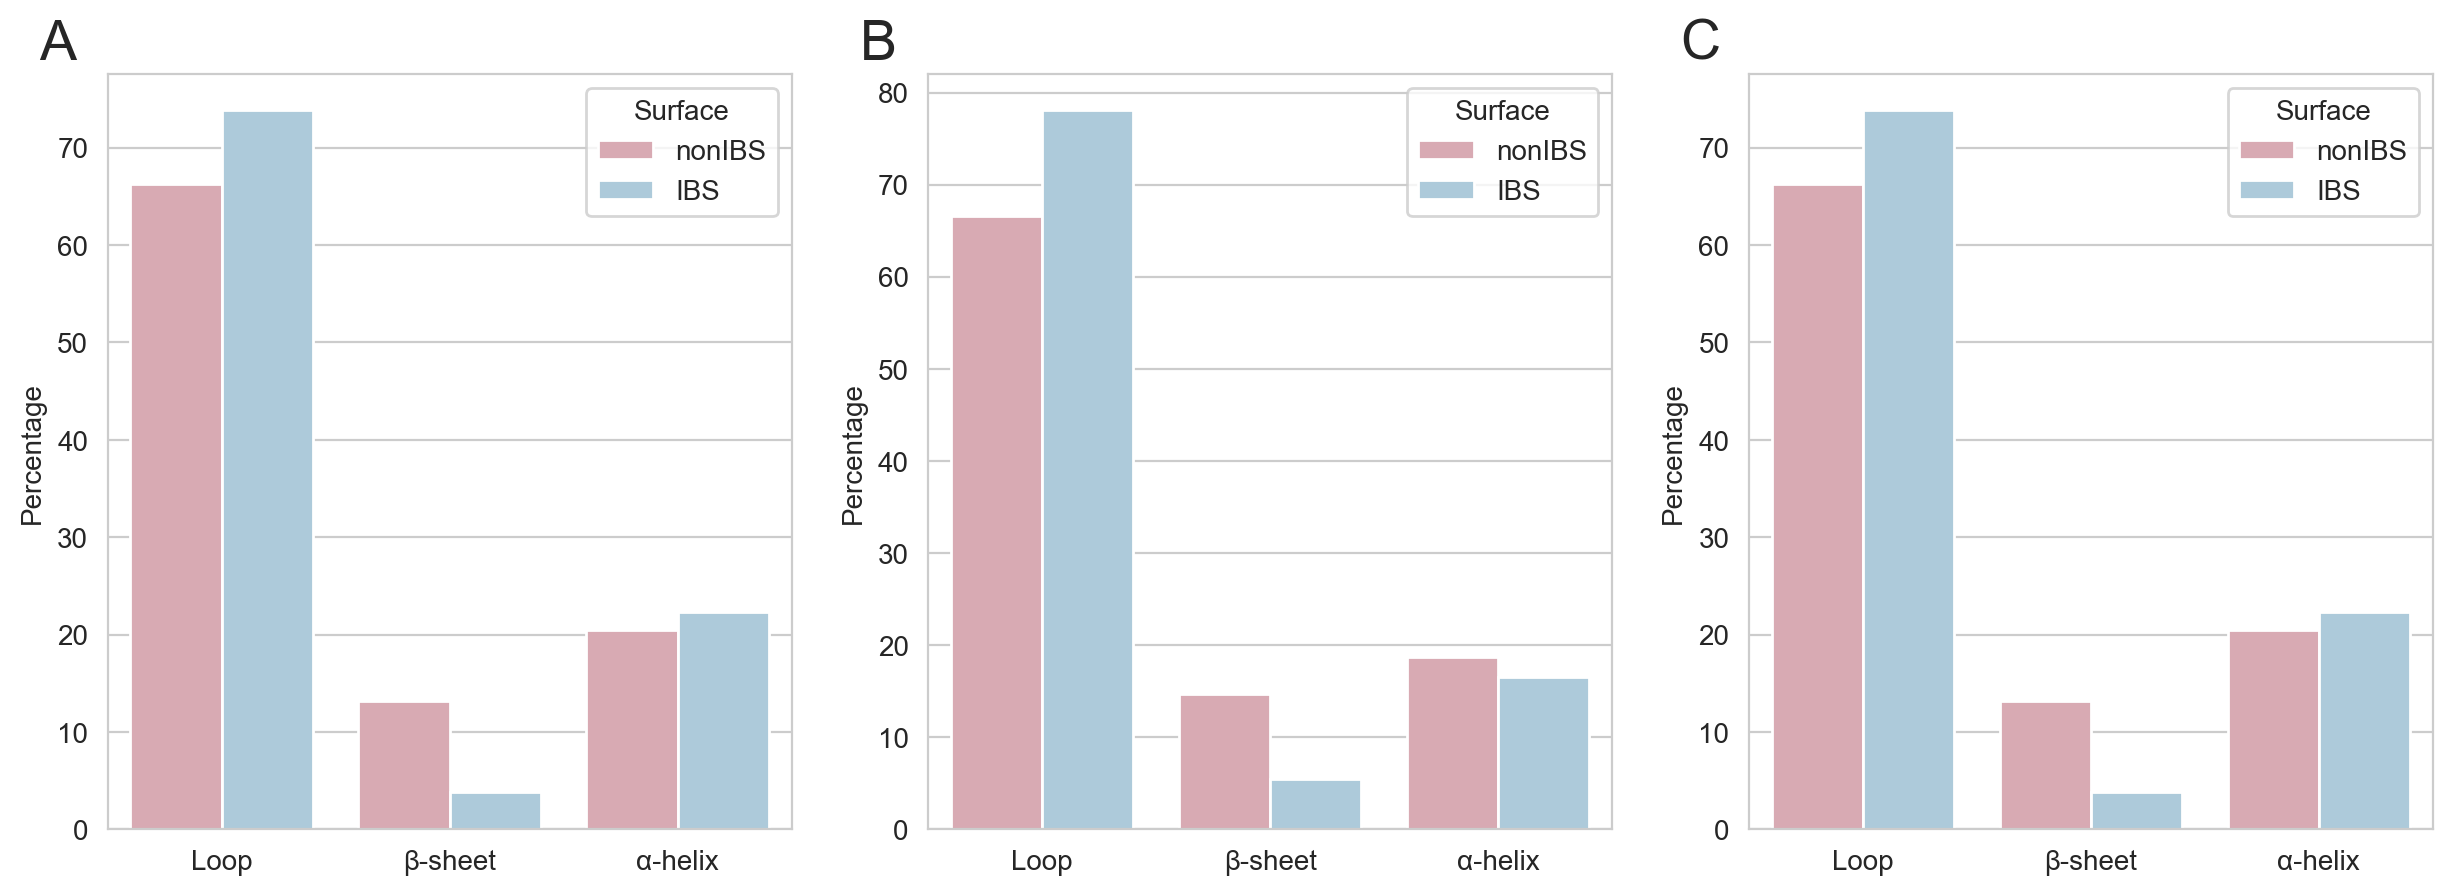

In [ ]:
MERGED.domainDf = backup_prot_HPIBS.copy()
sns.set_style("whitegrid") #Seaborn style

fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(ncols=3, nrows=1, width_ratios=[1,1,1], height_ratios=[1])
gs.update(hspace=0.05)
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[0,1])
ax2 = plt.subplot(gs[0,2])



#1.1 Composition
graph_HPIBS_envir = sns.barplot(data=tc_sec_struc_HPIBS,
                    x="Secondary Structure",
                    y="Percentage",
                    hue="Surface",
                    palette=palette_IBS,
                    ax=ax0)
_= graph_HPIBS_envir.set(title="",#HPIBS HP environment",
         xlabel="",
         )

#2. SSE noHPIBS composition
MERGED.domainDf = backup_prot_noHPIBS.copy()
tc_sec_struc_noHPIBS_envir_prot = MERGED.domainDf.query("protrusion == True").groupby("IBS").sec_struc.value_counts(normalize=True).to_frame('Percentage').reset_index()
tc_sec_struc_noHPIBS_envir_prot["Surface"] = tc_sec_struc["IBS"].apply(lambda x: "IBS" if x == True else "nonIBS")
labelsdict = {"C":"Loop", "E":"β-sheet","H":"α-helix"}
tc_sec_struc_noHPIBS_envir_prot["Secondary Structure"] = tc_sec_struc_noHPIBS_envir_prot["sec_struc"].apply(lambda x: labelsdict[x])
tc_sec_struc_noHPIBS_envir_prot["Percentage"] = tc_sec_struc_noHPIBS_envir_prot["Percentage"]*100

graph_noHPIBS_prot = sns.barplot(data=tc_sec_struc_noHPIBS_envir_prot,
                    x="Secondary Structure",
                    y="Percentage",
                    hue="Surface",
                    palette=palette_IBS,
                    ax=ax1)
_= graph_noHPIBS_prot.set(title="",#SSE noHPIBS protrusions",
         xlabel="")

#2. SSE noHPIBS environment

#1.1 Composition
graph_noHPIBS_envir = sns.barplot(data=tc_sec_struc_noHPIBS_envir,
                    x="Secondary Structure",
                    y="Percentage",
                    hue="Surface",
                    palette=palette_IBS,
                    ax=ax2)
_= graph_noHPIBS_envir.set(title="",#SSE noHPIBS protrusions' environment",
         xlabel="")

_= ax0.text(-0.1,1.02, "A",transform=ax0.transAxes, fontsize=20)
_= ax1.text(-0.1,1.02, "B",transform=ax1.transAxes, fontsize=20)
_= ax2.text(-0.1,1.02, "C",transform=ax2.transAxes, fontsize=20)

save_fig(f"FigS2{filesufix}", transparent=False, format=FORMAT)

MERGED.domainDf = backup_all.copy()

In [13]:
#Prepare Exclusion of PTB and other domains
#Procedure
#1. Get protein template from Mark Lemmon review (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1221219/pdf/10926821.pdf) or from the PDB
#2. search from this protein in rcsb PDB -> Annotation -> Click on the PFAM familly 
#3. In the results, display only PDB IDs 
#4. For each PDB, get S60 Cluster IDS. 
#5. Remove those S60 Cluster IDs from the PH superfamilly.

# LIST OF PFAM
# PTB = PF00640
# RANDB = PF00638
# EVH/WH1 = PF00568  

pdb_PTB = "2YT8_1,2YT7_1,6DM4_2,3O17_2,3D8F_1,2E45_1,2YT1_1,6O5O_1,1NU2_1,3O2M_2,3H8D_2,1NTV_1,5LW1_3,6FUZ_1,2G01_2,6LNM_2,5YI7_1,5YI8_1,4DBB_1,6F5E_3,2NMB_1,2MYQ_1,1N3H_1,3F0W_1,3SUZ_1,3SV1_1,1SHC_1,2L1C_1,1AQC_1,2YSC_1,3D8D_1,2YSZ_1,3D8E_1,1OY2_1,3VUG_2,4JMH_2,5NQH_1,3VUH_2,3VUK_2,3VUI_2,4E73_2,2FPD_1,3VUL_2,2EJ8_1,6ITU_1,1WJ1_1,3OXI_2,5C5B_2,5C5B_1,6F7O_1,2FPF_1,2LSW_1,1WGU_1,4Z88_2,2ELA_1,2ELB_1,2DYQ_1,2FPE_1,3VUM_2,5UWS_4,2GMX_2,6OVF_1,2IDH_1,2OEI_1,4H8S_1,2EAM_1,1OQN_1,1TCE_1,4G1W_2,4XWX_1,5YQG_2,1X11_1,1M7E_1,1MIL_1,4HYS_2,1P3R_1,2Z0N_1,2LMR_1,3QYB_1,5NJK_1,2Q12_1,5NJJ_1,3PTG_2,3DXC_1,3QYE_1,1X45_1,1UKI_2,3DXE_1,1Y7N_1,3SO6_1,2Z0O_1,2KIV_1,2Q13_1,4NC6_1,3DXD_1,1UKH_2,2HO2_1,2YT0_1,2M38_1,2H96_2,5ZRY_1,4HYU_2,1DDM_1,1QG1_2,1U39_1,4IZY_2,3V3V_2,3VUD_2,6KMH_2,2KE7_1,1U3B_1,2ROZ_2,5CZI_2,1U37_1,4H39_2,1U38_1"
pdb_RANDB = "5UWW_2,6KFT_2,1K5G_2,5UWT_2,3UIO_4,5UWI_2,6CIT_2,4HAU_2,4HB2_2,4HAT_2,4HB3_2,4HB4_2,4HAX_3,4HAV_2,4HAW_2,3TJ3_2,4HB0_2,5DIF_2,1XKE_1,5DH9_2,4GMX_2,2CRF_1,6XJT_2,6XJU_2,6XJR_2,6XJS_2,5DHF_2,5DHA_2,4LQW_1,5UWJ_2,3UIP_4,5UWH_2,3UIN_4,5JLJ_2,5ZPU_2,2C1M_2,4GA0_1,6A38_2,2C1T_2,5DI9_2,6A3E_2,6A3C_2,6A3B_2,6A3A_2,4HAZ_2,4HAY_2,4GPT_2,2LAS_2,7L5E_2,4GA1_1,1UN0_2,5UWU_2,1RRP_2,5UWS_2,3OAN_1,5CLL_2,5YRO_2,6XJP_2,4L6E_1,6M6X_2,5CLQ_2,6X2M_2,6X2O_2,5YSU_2,6X2S_2,6X2U_2,5YST_2,6X2V_2,6X2W_2,6X2X_2,6X2Y_2,6X2R_2,6X2P_2,4WVF_2,5YTB_2,2EC1_1,5UWQ_2,1K5D_2,5UWR_2,5UWO_2,5UWP_2,2Y8G_1,3N7C_1,4I9Y_1,3M1I_2,5XZX_2,1Z5S_4,2Y8F_1,3WYF_2,4GA2_1"
pdb_EVH = "1TJ6_1,5N91_1,5ZZ9_1,5N9C_1,1CEE_2,2XQN_2,3RSE_8,6RCJ_1,6RCF_1,3CHW_3,2V8C_2,2PBD_3,6RD2_1,2PAV_3,2IYB_1,6XXR_1,7A5M_1,2OT0_2,1XOD_1,1I2H_1,1EVH_1,6V65_1,1USD_1,1USE_1,7AKI_1,1ZUK_2,4MY6_1,2IFS_1,3SYX_1,1QC6_1,2JP2_1,3CVF_1,1T84_1,5N9P_1,2FF3_2,6UHC_8,1I7A_1,2P8V_1,5NDU_1,2LNH_1,3M3N_2,5NCG_1,5NCF_1,5NEG_1,2A3Z_3,6XVT_1,1MKE_1,2VCP_2,2HO2_2,3CVE_1,1EJ5_1,5NCP_1,5ND0_1,1DDW_1,5NC7_1,1DDV_1,2K42_1,4CC7_2,4CC3_2,1EGX_1,4CC2_2,5NBF_1,5NAJ_1,6V6F_1,5NC2_1,5NBX_1"
# pdb_DCP1="5JP4_1,2QKL_1,4B6H_1,5J3Q_1,5N2V_1,1Q67_1,6Y3Z_2,2QKM_1,5J3Y_1,5LOP_2,5LON_2,5KQ1_1,6AM0_2,5J3T_1,2LYD_1,5KQ4_1"
pdb_PTB = [x[:4] for x in pdb_PTB.split(',')]
pdb_RANDB = [x[:4] for x in pdb_RANDB.split(',')]
pdb_EVH = [x[:4] for x in pdb_EVH.split(',')]
# pdb_DCP1 = [x[:4] for x in pdb_DCP1.split(',')]

pdbs_to_remove = pdb_PTB+pdb_RANDB+pdb_EVH


removeS60 = DATASET.query("domain == 'PH' and pdb in @pdbs_to_remove")["S60"].unique()
cathpdbs_to_remove = DATASET.query("domain == 'PH' and S60 in @removeS60").cathpdb.unique()
print(f"{len(cathpdbs_to_remove)} will be removed IN TOTAL")
DATASET = DATASET.query("cathpdb not in @cathpdbs_to_remove")
pd.DataFrame(cathpdbs_to_remove).to_csv(f"{FIGURESFOLDER}/Fake_PH.csv", index=False, header=False)

142 will be removed IN TOTAL


In [14]:
# import pepr2ds.dataset.tagibs
# importlib.reload(pepr2ds.dataset.tagibs)



In [15]:
import importlib
import pepr2ds
importlib.reload(pepr2ds)
from pepr2ds.dataset.tagibs import Dataset
PH = Dataset(DATASET,PEPRMINT_FOLDER)
PH.tag_ibs(DATASET, 
            domain = 'PH', #Domain
            pdbreference = "2da0A00", #PDB Template
            includeResidueRange = [[20,26],[42,50]], #Include those residues in IBS
            excludeResidueRange=[], #Exclude thoses residues from IBS
            extendSS=False, #Extend the secondary structures
            withAlignment=False, #restrict the results with pdb that have a sequences.
            onlyC=False, #get only COIL in the IBS.
            cathCluster=clusterLevel, #Structure redundancy filter
            Uniref="uniref90", #Sequence redundancy filter
            addSequence=False, #add the non structural data in the IBS/NONIBS dataset.
            extendAlign=False, #Extend the secondary structure instead of a raw "cut" based on the alignment position
            excludeStrand=False, #Exclude "strand" From secondary structure
            overide_axis_mode = True, #use the Zaxis instead of the alignment to tag the IBS
            zaxis=ZAXISLEVEL, #Z axis plane to define "IBS" or not IBS
            extendCoilOnly = False, #Extend coil only.
            coordinates_folder_name = 'zaligned', #Where are the PDBs
            data_type = DATATYPE, #Type of data asked ('cath' or 'alfafold' or 'cath+af')
            base_folder= = ALIGNMENTFOLDER,  #'Type of alignment folder'
          )
print(len(PH.ibs.cathpdb.unique()))
if SHOW_EXAMPLE: 
    PH.show_structure_and_plane('2da0A00', 'zaligned')
if DO_REPORT:
    PH.analysis.report(displayHTML=False)
if DO_PICTURES:
    PH.generate_picutre_of_IBS()

<module 'pepr2ds' from '/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/pepr2ds/__init__.py'>

IndentationError: expected an indented block (tagibs.py, line 570)

### Alternative Orientation

## C2 Domain

In [9]:
## Command line for alignment!!!!
if DO_ALIGNMENT:
    !cd /Users/thibault/Documents/WORK/peprmint/databases/cath/domains/C2
    !/Users/thibault/miniconda3/envs/peprmint/bin/python ~/OneDrive\ -\ University\ of\ Bergen/projects/peprmint/dev/pepermintdataset/scripts/align_on_z.py -d C2 -ref 1rsyA00 -res1 169 -res2 178 -res3 237 -i raw -o zaligned

In [12]:
import importlib
import pepr2ds
importlib.reload(pepr2ds)
from pepr2ds.dataset.tagibs import Dataset
C2 = Dataset(DATASET,PEPRMINT_FOLDER)
C2.tag_ibs(DATASET, 
            domain = 'C2', #Domain
            pdbreference = "1rsyA00",
            includeResidueRange = [[171,177],[232,238]], #CHANGE 173 to 171 and run again!
            excludeResidueRange=[], #Exclude thoses residues from IBS
            extendSS=False, #Extend the secondary structures
            withAlignment=False, #restrict the results with pdb that have a sequences.
            onlyC=False, #get only COIL in the IBS.
            cathCluster=clusterLevel, #Structure redundancy filter
            Uniref="uniref90", #Sequence redundancy filter
            addSequence=False, #add the non structural data in the IBS/NONIBS dataset.
            extendAlign=False, #Extend the secondary structure instead of a raw "cut" based on the alignment position
            excludeStrand=False, #Exclude "strand" From secondary structure
            overide_axis_mode = True, #use the Zaxis instead of the alignment to tag the IBS
            zaxis=ZAXISLEVEL, #Z axis plane to define "IBS" or not IBS
            extendCoilOnly = False, #Extend coil only.
            coordinates_folder_name = 'zaligned', #Where are the PDBs 
          )


<module 'pepr2ds' from '/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/pepr2ds/__init__.py'>

TOTO
Domain= C2
selecting amino acids
/Users/thibault/Documents/WORK/peprmint/databases/cath//domains/C2/zaligned
UPDATING COORDINATES



taggin IBS



len IBS 112
len nonIBS 112


In [11]:
if SHOW_EXAMPLE:
    C2.show_structure_and_plane('1rsyA00', 'zaligned')

In [12]:
if DO_REPORT:
    C2.analysis.report(displayHTML=False)


making report for C2


/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1916: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1006: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [13]:
if DO_PICTURES:
    C2.generate_picutre_of_IBS()

## START Domain

### orientation 1

In [14]:
if DO_ALIGNMENT:
    !/Users/thibault/miniconda3/envs/peprmint/bin/python ~/OneDrive\ -\ University\ of\ Bergen/projects/peprmint/dev/pepermintdataset/scripts/align_on_z.py -d START -ref 2e3mA00 -res1 412 -res2 448 -res3 515 -i raw -o orientationA

In [15]:
import importlib
import pepr2ds
importlib.reload(pepr2ds)
from pepr2ds.dataset.tagibs import Dataset
STARTo1 = Dataset(DATASET,PEPRMINT_FOLDER)
STARTo1.tag_ibs(DATASET, 
            domain = 'START', #Domain
            pdbreference = "2e3mA00",
            includeResidueRange = [], #CHANGE 173 to 171 and run again!
            excludeResidueRange=[], #Exclude thoses residues from IBS
            extendSS=False, #Extend the secondary structures
            withAlignment=False, #restrict the results with pdb that have a sequences.
            onlyC=False, #get only COIL in the IBS.
            cathCluster=clusterLevel, #Structure redundancy filter
            Uniref="uniref90", #Sequence redundancy filter
            addSequence=False, #add the non structural data in the IBS/NONIBS dataset.
            extendAlign=False, #Extend the secondary structure instead of a raw "cut" based on the alignment position
            excludeStrand=False, #Exclude "strand" From secondary structure
            overide_axis_mode = True, #use the Zaxis instead of the alignment to tag the IBS
            zaxis=ZAXISLEVEL, #Z axis plane to define "IBS" or not IBS
            extendCoilOnly = False, #Extend coil only.
            coordinates_folder_name = "orientationA"  
)

/Users/thibault/miniconda3/envs/peprmint/lib/python3.7/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


<module 'Ui' from '/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py'>

selecting amino acids
UPDATING COORDINATES



taggin IBS



len IBS 201
len nonIBS 201


In [16]:
if SHOW_EXAMPLE:
    STARTo1.show_structure_and_plane('2e3mA00', 'orientationA')

In [17]:
if DO_REPORT:
    STARTo1.analysis.report(displayHTML=False, customFolder='STARTorientationA')


making report for START


/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1916: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1006: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [18]:
if DO_PICTURES:
    STARTo1.generate_picutre_of_IBS("orientationA")

### Orientation 2

In [19]:
if DO_ALIGNMENT:
    !/Users/thibault/miniconda3/envs/peprmint/bin/python ~/OneDrive\ -\ University\ of\ Bergen/projects/peprmint/dev/pepermintdataset/scripts/align_on_z.py -d START -ref 2e3mA00 -res1 567 -res2 470 -res3 509 -i raw -o orientationB

In [21]:
if SHOW_EXAMPLE:
    STARTo2.show_structure_and_plane('2e3mA00', 'orientationB')

In [22]:
if DO_REPORT:
    STARTo2.analysis.report(displayHTML=False, customFolder='STARTorientationB')
if DO_PICTURES:
    STARTo2.generate_picutre_of_IBS("orientationB")

making report for START


/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1916: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1006: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


## C1

In [23]:
if DO_ALIGNMENT:
    !/Users/thibault/miniconda3/envs/peprmint/bin/python ~/OneDrive\ -\ University\ of\ Bergen/projects/peprmint/dev/pepermintdataset/scripts/align_on_z.py -d C1 -ref 1ptrA00 -res1 243 -res2 257 -res3 237 -i raw -o zaligned

In [24]:
import importlib
import pepr2ds
importlib.reload(pepr2ds)
from pepr2ds.dataset.tagibs import Dataset

C1 = Dataset(DATASET,PEPRMINT_FOLDER)
C1.tag_ibs(DATASET, 
            domain = 'C1', #Domain
            pdbreference = "1ptrA00",
            includeResidueRange = [], #CHANGE 173 to 171 and run again!
            excludeResidueRange=[], #Exclude thoses residues from IBS
            extendSS=False, #Extend the secondary structures
            withAlignment=False, #restrict the results with pdb that have a sequences.
            onlyC=False, #get only COIL in the IBS.
            cathCluster=clusterLevel, #Structure redundancy filter
            Uniref="uniref90", #Sequence redundancy filter
            addSequence=False, #add the non structural data in the IBS/NONIBS dataset.
            extendAlign=False, #Extend the secondary structure instead of a raw "cut" based on the alignment position
            excludeStrand=False, #Exclude "strand" From secondary structure
            overide_axis_mode = True, #use the Zaxis instead of the alignment to tag the IBS
            zaxis=ZAXISLEVEL, #Z axis plane to define "IBS" or not IBS
            extendCoilOnly = False, #Extend coil only.
            coordinates_folder_name = "zaligned"  
          )

/Users/thibault/miniconda3/envs/peprmint/lib/python3.7/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


<module 'Ui' from '/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py'>

selecting amino acids
UPDATING COORDINATES



taggin IBS



len IBS 38
len nonIBS 38


In [26]:
if SHOW_EXAMPLE:
    C1.show_structure_and_plane('1ptrA00', 'zaligned2')

In [27]:
if DO_PICTURES:
    C1.generate_picutre_of_IBS()

In [28]:
if DO_REPORT:
    C1.analysis.report(displayHTML=False)


making report for C1


/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1916: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1006: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


## SH2

In [29]:
if DO_ALIGNMENT:
    !/Users/thibault/miniconda3/envs/peprmint/bin/python ~/OneDrive\ -\ University\ of\ Bergen/projects/peprmint/dev/pepermintdataset/scripts/align_on_z.py -d SH2 -ref 2oq1A03 -res1 180 -res2 209 -res3 243 -i superposed -o zaligned

In [31]:
if SHOW_EXAMPLE:
    SH2.show_structure_and_plane('2oq1A03', 'zaligned')

In [32]:
if DO_PICTURES:
    SH2.generate_picutre_of_IBS("zaligned")

In [33]:
if DO_REPORT:
    SH2.analysis.report(displayHTML=False)


making report for SH2


/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1916: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1006: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


## C2DIS

In [34]:
if DO_ALIGNMENT:
    !/Users/thibault/miniconda3/envs/peprmint/bin/python ~/OneDrive\ -\ University\ of\ Bergen/projects/peprmint/dev/pepermintdataset/scripts/align_on_z.py -d C2DIS -ref 1czsA00 -res1 23 -res2 76 -res3 45 -i superposed -o zaligned

In [35]:
import importlib
import pepr2ds
importlib.reload(pepr2ds)
from pepr2ds.dataset.tagibs import Dataset

C2DIS = Dataset(DATASET,PEPRMINT_FOLDER)
C2DIS.tag_ibs(DATASET, 
            domain = 'C2DIS', #Domain
            pdbreference = "1czsA00",
            includeResidueRange = [], #CHANGE 173 to 171 and run again!
            excludeResidueRange=[], #Exclude thoses residues from IBS
            extendSS=False, #Extend the secondary structures
            withAlignment=False, #restrict the results with pdb that have a sequences.
            onlyC=False, #get only COIL in the IBS.
            cathCluster=clusterLevel, #Structure redundancy filter
            Uniref="uniref90", #Sequence redundancy filter
            addSequence=False, #add the non structural data in the IBS/NONIBS dataset.
            extendAlign=False, #Extend the secondary structure instead of a raw "cut" based on the alignment position
            excludeStrand=False, #Exclude "strand" From secondary structure
            overide_axis_mode = True, #use the Zaxis instead of the alignment to tag the IBS
            zaxis=ZAXISLEVEL, #Z axis plane to define "IBS" or not IBS
            extendCoilOnly = False, #Extend coil only.
            coordinates_folder_name = "zaligned"  
          )

/Users/thibault/miniconda3/envs/peprmint/lib/python3.7/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


<module 'Ui' from '/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py'>

selecting amino acids
UPDATING COORDINATES



taggin IBS



len IBS 320
len nonIBS 325


In [36]:
if SHOW_EXAMPLE:
    C2DIS.show_structure_and_plane('2okxA03', 'zalignedS95')

In [37]:
if DO_REPORT:
    C2DIS.analysis.report(displayHTML=False)


making report for C2DIS


/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1916: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1006: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [38]:
if DO_PICTURES:
    C2DIS.generate_picutre_of_IBS(subfolder='zaligned')

## FYVE

In [39]:
if DO_ALIGNMENT:
    !/Users/thibault/miniconda3/envs/peprmint/bin/python ~/OneDrive\ -\ University\ of\ Bergen/projects/peprmint/dev/pepermintdataset/scripts/align_on_z.py -d FYVE -ref 1jocA02 -res1 1373 -res2 1392 -res3 1382 -i superposed -o zaligned

In [40]:
import importlib
import pepr2ds
importlib.reload(pepr2ds)
from pepr2ds.dataset.tagibs import Dataset

FYVE = Dataset(DATASET,PEPRMINT_FOLDER)
FYVE.tag_ibs(DATASET, 
            domain = 'FYVE', #Domain
            pdbreference = "1jocA02",
            includeResidueRange = [], #CHANGE 173 to 171 and run again!
            excludeResidueRange=[], #Exclude thoses residues from IBS
            extendSS=False, #Extend the secondary structures
            withAlignment=False, #restrict the results with pdb that have a sequences.
            onlyC=False, #get only COIL in the IBS.
            cathCluster=clusterLevel, #Structure redundancy filter
            Uniref="uniref90", #Sequence redundancy filter
            addSequence=False, #add the non structural data in the IBS/NONIBS dataset.
            extendAlign=False, #Extend the secondary structure instead of a raw "cut" based on the alignment position
            excludeStrand=False, #Exclude "strand" From secondary structure
            overide_axis_mode = True, #use the Zaxis instead of the alignment to tag the IBS
            zaxis=ZAXISLEVEL, #Z axis plane to define "IBS" or not IBS
            extendCoilOnly = False, #Extend coil only.
            coordinates_folder_name = "zaligned"  
          )

/Users/thibault/miniconda3/envs/peprmint/lib/python3.7/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


<module 'Ui' from '/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py'>

selecting amino acids
UPDATING COORDINATES



taggin IBS



len IBS 262
len nonIBS 262


In [41]:
if SHOW_EXAMPLE:
    FYVE.show_structure_and_plane('1jocA02', 'zaligned')

In [42]:
if DO_REPORT:
    FYVE.analysis.report(displayHTML=False)


making report for FYVE
Error while generating shannon entropy graphs


/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1916: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1006: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [43]:
if DO_PICTURES:
    FYVE.generate_picutre_of_IBS(subfolder='zaligned')

## PX 

In [44]:
if DO_ALIGNMENT:
    !/Users/thibault/miniconda3/envs/peprmint/bin/python ~/OneDrive\ -\ University\ of\ Bergen/projects/peprmint/dev/pepermintdataset/scripts/align_on_z.py -d PX -ref 1h6hA00 -res1 33 -res2 74 -res3 100 -i superposed -o zaligned

In [45]:
import importlib
import pepr2ds
importlib.reload(pepr2ds)
from pepr2ds.dataset.tagibs import Dataset
PX = Dataset(DATASET,PEPRMINT_FOLDER)
PX.tag_ibs(DATASET, 
            domain = 'PX', #Domain
            pdbreference = "1h6hA00",
            includeResidueRange = [], #CHANGE 173 to 171 and run again!
            excludeResidueRange=[], #Exclude thoses residues from IBS
            extendSS=False, #Extend the secondary structures
            withAlignment=False, #restrict the results with pdb that have a sequences.
            onlyC=False, #get only COIL in the IBS.
            cathCluster=clusterLevel, #Structure redundancy filter
            Uniref="uniref90", #Sequence redundancy filter
            addSequence=False, #add the non structural data in the IBS/NONIBS dataset.
            extendAlign=False, #Extend the secondary structure instead of a raw "cut" based on the alignment position
            excludeStrand=False, #Exclude "strand" From secondary structure
            overide_axis_mode = True, #use the Zaxis instead of the alignment to tag the IBS
            zaxis=ZAXISLEVEL, #Z axis plane to define "IBS" or not IBS
            extendCoilOnly = False, #Extend coil only.
            coordinates_folder_name = "zaligned"  
          )

/Users/thibault/miniconda3/envs/peprmint/lib/python3.7/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


<module 'Ui' from '/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py'>

selecting amino acids
UPDATING COORDINATES



taggin IBS



len IBS 47
len nonIBS 47


In [46]:
if DO_REPORT:
    PX.analysis.report(displayHTML=False)


making report for PX


/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1916: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1006: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [47]:
if DO_PICTURES:
    PX.generate_picutre_of_IBS(subfolder='zaligned')

## ENTH

In [48]:
if DO_ALIGNMENT:
    !/Users/thibault/miniconda3/envs/peprmint/bin/python ~/OneDrive\ -\ University\ of\ Bergen/projects/peprmint/dev/pepermintdataset/scripts/align_on_z.py -d ENTH -ref 1h0aA00 -res1 17 -res2 70 -res3 116 -i superposed -o zaligned

In [49]:
import importlib
import pepr2ds
importlib.reload(pepr2ds)
from pepr2ds.dataset.tagibs import Dataset

ENTH = Dataset(DATASET,PEPRMINT_FOLDER)
ENTH.tag_ibs(DATASET, 
            domain = 'ENTH', #Domain
            pdbreference = "1h0aA00",
            includeResidueRange = [], #CHANGE 173 to 171 and run again!
            excludeResidueRange=[], #Exclude thoses residues from IBS
            extendSS=False, #Extend the secondary structures
            withAlignment=False, #restrict the results with pdb that have a sequences.
            onlyC=False, #get only COIL in the IBS.
            cathCluster=clusterLevel, #Structure redundancy filter
            Uniref="uniref90", #Sequence redundancy filter
            addSequence=False, #add the non structural data in the IBS/NONIBS dataset.
            extendAlign=False, #Extend the secondary structure instead of a raw "cut" based on the alignment position
            excludeStrand=False, #Exclude "strand" From secondary structure
            overide_axis_mode = True, #use the Zaxis instead of the alignment to tag the IBS
            zaxis=ZAXISLEVEL, #Z axis plane to define "IBS" or not IBS
            extendCoilOnly = False, #Extend coil only.
            coordinates_folder_name = "zaligned"  
          )

/Users/thibault/miniconda3/envs/peprmint/lib/python3.7/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


<module 'Ui' from '/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py'>

selecting amino acids
UPDATING COORDINATES



taggin IBS



len IBS 51
len nonIBS 51


In [50]:
if SHOW_EXAMPLE:
    ENTH.show_structure_and_plane('1h0aA00', 'zaligned')

In [51]:
if DO_REPORT:
    ENTH.analysis.report(displayHTML=False)

making report for ENTH


/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1916: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1006: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [52]:
if DO_PICTURES:
    ENTH.generate_picutre_of_IBS(subfolder='zaligned')

## PLD

In [53]:
DATASET.domain = DATASET.domain.astype(str)
DATASET.loc[DATASET.domain == "PIPLC", "domain"] = "PLD"


In [54]:
if DO_ALIGNMENT:
    !/Users/thibault/miniconda3/envs/peprmint/bin/python ~/OneDrive\ -\ University\ of\ Bergen/projects/peprmint/dev/pepermintdataset/scripts/align_on_z.py -d PLD -ref 3rlhA00 -res1 59 -res2 205 -res3 198 -i superposed -o orientationOPM
    !/Users/thibault/miniconda3/envs/peprmint/bin/python ~/OneDrive\ -\ University\ of\ Bergen/projects/peprmint/dev/pepermintdataset/scripts/align_on_z.py -d PLD -ref 3rlhA00 -res1 53 -res2 41 -res3 99 -i superposed -o orientationCAGE



### Orientation OPM

In [55]:
import importlib
import pepr2ds
importlib.reload(pepr2ds)
from pepr2ds.dataset.tagibs import Dataset

PLDopm = Dataset(DATASET,PEPRMINT_FOLDER)
PLDopm.tag_ibs(DATASET, 
            domain = 'PLD', #Domain
            pdbreference = "3rlhA00",
            includeResidueRange = [], #CHANGE 173 to 171 and run again!
            excludeResidueRange=[], #Exclude thoses residues from IBS
            extendSS=False, #Extend the secondary structures
            withAlignment=False, #restrict the results with pdb that have a sequences.
            onlyC=False, #get only COIL in the IBS.
            cathCluster=clusterLevel, #Structure redundancy filter
            Uniref="uniref90", #Sequence redundancy filter
            addSequence=False, #add the non structural data in the IBS/NONIBS dataset.
            extendAlign=False, #Extend the secondary structure instead of a raw "cut" based on the alignment position
            excludeStrand=False, #Exclude "strand" From secondary structure
            overide_axis_mode = True, #use the Zaxis instead of the alignment to tag the IBS
            zaxis=ZAXISLEVEL, #Z axis plane to define "IBS" or not IBS
            extendCoilOnly = False, #Extend coil only.
            coordinates_folder_name = "orientationOPM"  
          )
if SHOW_EXAMPLE:
    PLDopm.show_structure_and_plane('3rlhA00', 'orientationOPM')
if DO_REPORT:
    PLDopm.analysis.report(displayHTML=False, customFolder='PLDopm')
if DO_PICTURES:
    PLDopm.generate_picutre_of_IBS(subfolder='orientationOPM')

/Users/thibault/miniconda3/envs/peprmint/lib/python3.7/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


<module 'Ui' from '/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py'>

selecting amino acids
UPDATING COORDINATES



taggin IBS



len IBS 67
len nonIBS 67
making report for PLD
Error while generating shannon entropy graphs


/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1916: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1006: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


## ANNEXIN

In [57]:
DATASET.domain = DATASET.domain.astype(str)
DATASET.loc[DATASET.domain == "ANEXIN", "domain"] = "ANNEXIN"


In [58]:
if DO_ALIGNMENT:
    !/Users/thibault/miniconda3/envs/peprmint/bin/python ~/OneDrive\ -\ University\ of\ Bergen/projects/peprmint/dev/pepermintdataset/scripts/align_on_z.py -d ANNEXIN -ref 1a8aA01 -res1 25 -res2 68 -res3 77 -i superposed -o zaligned


In [59]:
import importlib
import pepr2ds
importlib.reload(pepr2ds)
from pepr2ds.dataset.tagibs import Dataset

ANNEXIN = Dataset(DATASET,PEPRMINT_FOLDER)
ANNEXIN.tag_ibs(DATASET, 
            domain = 'ANNEXIN', #Domain
            pdbreference = "1a8aA01",
            includeResidueRange = [], #CHANGE 173 to 171 and run again!
            excludeResidueRange=[], #Exclude thoses residues from IBS
            extendSS=False, #Extend the secondary structures
            withAlignment=False, #restrict the results with pdb that have a sequences.
            onlyC=False, #get only COIL in the IBS.
            cathCluster=clusterLevel, #Structure redundancy filter
            Uniref="uniref90", #Sequence redundancy filter
            addSequence=False, #add the non structural data in the IBS/NONIBS dataset.
            extendAlign=False, #Extend the secondary structure instead of a raw "cut" based on the alignment position
            excludeStrand=False, #Exclude "strand" From secondary structure
            overide_axis_mode = True, #use the Zaxis instead of the alignment to tag the IBS
            zaxis=ZAXISLEVEL, #Z axis plane to define "IBS" or not IBS
            extendCoilOnly = False, #Extend coil only.
            coordinates_folder_name = "zaligned"  
          )
if SHOW_EXAMPLE:
    ANNEXIN.show_structure_and_plane('1a8aA01', 'zaligned')

/Users/thibault/miniconda3/envs/peprmint/lib/python3.7/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


<module 'Ui' from '/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py'>

selecting amino acids
UPDATING COORDINATES



taggin IBS



len IBS 122
len nonIBS 122


In [60]:
if DO_REPORT:
    ANNEXIN.analysis.report(displayHTML=False)
if DO_PICTURES:
    ANNEXIN.generate_picutre_of_IBS(subfolder='zaligned')

making report for ANNEXIN


/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1916: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1006: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


## PLA

In [61]:
if DO_ALIGNMENT:
    !/Users/thibault/miniconda3/envs/peprmint/bin/python ~/OneDrive\ -\ University\ of\ Bergen/projects/peprmint/dev/pepermintdataset/scripts/align_on_z.py -d PLA -ref 1pocA00 -res1 7 -res2 92 -res3 76 -i superposed -o zaligned

In [1]:
import importlib
import pepr2ds
importlib.reload(pepr2ds)
from pepr2ds.dataset.tagibs import Dataset

PLA = Dataset(DATASET,PEPRMINT_FOLDER)
PLA.tag_ibs(DATASET, 
            domain = 'PLA', #Domain
            pdbreference = "1pocA00",
            includeResidueRange = [], #CHANGE 173 to 171 and run again!
            excludeResidueRange=[], #Exclude thoses residues from IBS
            extendSS=False, #Extend the secondary structures
            withAlignment=False, #restrict the results with pdb that have a sequences.
            onlyC=False, #get only COIL in the IBS.
            cathCluster=clusterLevel, #Structure redundancy filter
            Uniref="uniref90", #Sequence redundancy filter
            addSequence=False, #add the non structural data in the IBS/NONIBS dataset.
            extendAlign=False, #Extend the secondary structure instead of a raw "cut" based on the alignment position
            excludeStrand=False, #Exclude "strand" From secondary structure
            overide_axis_mode = True, #use the Zaxis instead of the alignment to tag the IBS
            zaxis=ZAXISLEVEL, #Z axis plane to define "IBS" or not IBS
            extendCoilOnly = False, #Extend coil only.
            coordinates_folder_name = "zaligned"  
          )
if SHOW_EXAMPLE:
    PLA.show_structure_and_plane('1pocA00', 'zaligned')

/Users/thibault/miniconda3/envs/peprmint/lib/python3.7/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


/Users/thibault/miniconda3/envs/peprmint/lib/python3.7/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


NameError: name 'DATASET' is not defined

In [63]:
if DO_REPORT:
    PLA.analysis.report(displayHTML=False)
    
if DO_PICTURES:
    PLA.generate_picutre_of_IBS(subfolder='zaligned')

making report for PLA
Error while generating shannon entropy graphs


/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1916: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/thibault/OneDrive - University of Bergen/projects/peprmint/dev/pepermintdataset/notebooks/Ui.py:1006: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


## MERGED DATASET

In [ ]:
def merge_dataset(**kwargs):
    importlib.reload(pepr2ds)
    from pepr2ds.dataset.tagibs import Dataset
    merged = Dataset(DATASET,PEPRMINT_FOLDER)

    merged.ibs = pd.concat([x.ibs for x in kwargs.values()])
    merged.nonibs = pd.concat([x.nonibs for x in kwargs.values()])
    merged.domainDf = pd.concat([x.domainDf for x in kwargs.values()])
    domainLabel = "+".join([x for x in kwargs.keys()])
    merged.domainLabel = domainLabel
    return(merged)
    

if DO_REPORT:
    MERGED = merge_dataset(PH=PH, C2=C2, START=STARTo1, C1=C1, C2DIS=C2DIS, PX=PX, ENTH=ENTH, PLD=PLDcage, ANNEXIN=ANNEXIN, PLA=PLA)
    MERGED.analysis.report(displayHTML=False)